In [7]:
from contextlib import contextmanager
import sys, os

@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout
            
            
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.rcParams['lines.linewidth']=1
plt.rcParams['axes.facecolor']='w'

n_t_d = []
with open("../manuscript_code/province-biweek_with_delays.csv") as f:
    i = 0
    for line in f.readlines():
        if i > 0:
            n_t_d.append(line.replace("\n","").split(','))
        i+=1

n_t_d_1 = []

for elm in n_t_d:
    if elm[2] == "10":
        n_t_d_1.append(elm)


index_to_dates = {}
dates_to_index = {}
count = 0
for i in ["2014","2015","2016"]:
    for j in range(1,27):
        index_to_dates[count] = str(i)+str(j)
        dates_to_index[str(i)+str(j)] = count
        count +=1
        
reporting_matrix = np.zeros((26*3,26*3))

for elm in n_t_d_1:
    try:
        sick_date = elm[0]+elm[1]
        report_date = elm[-2] + elm[-1]
        cases = elm[3]
        reporting_matrix_row = dates_to_index[sick_date] 
        reporting_matrix_col =  dates_to_index[report_date] 
        reporting_matrix[reporting_matrix_row,reporting_matrix_col] = int(cases)
    except:
        pass
np.set_printoptions(suppress=True)    #np.set_printoptions(threshold=np.nan)

D=26
n_t_d = np.zeros((len(reporting_matrix),D))

for i in range(len(reporting_matrix)):
    for j in range(i,i+D):
        try:
            n_t_d[i,j-i] = reporting_matrix[i][j]
        except:
            pass
        
        
n_t_d = n_t_d 

p_hat_sim_2 = []

for row in range(len(n_t_d)):
    #print (n_t_d[row],max(n_t_d[row]))
    p_hat_sim_2.append(n_t_d[row]/sum(n_t_d[row]))
    
#print (p_hat_sim)
dates = []
for i in ["2014","2015","2016"]:
    for j in range(1,27):
        dates.append(i + " - "  + str(j))
    
    
    
every_other_date = []
for i in np.arange(0,len(dates),10):
    every_other_date.append(dates[i])
from matplotlib.pyplot import cm


FSIZE = 15
plt.figure(figsize=(8,8))
plt.ylabel("Incidence",fontsize=FSIZE)
plt.xlabel("Time",fontsize=FSIZE)
#plt.imshow(p_hat_sim,aspect='auto',cmap=cm.Blues)

dates = []
for i in ["2014","2015","2016"]:
    for j in range(1,27):
        dates.append(i + " - "  + str(j))
    
    
    
every_other_date = []
for i in np.arange(0,len(dates),13):
    every_other_date.append(dates[i])


#plt.plot(np.sum(n_t_d,axis=1)[60:70])
plt.ylabel("Incidence")


plt.xticks(np.arange(0,len(np.sum(n_t_d,axis=1)),13), every_other_date, size='small')

plt.plot(np.sum(n_t_d,axis=1))

#plt.yticks(np.arange(0,len(dates),10), every_other_date, size='small',fontsize=FSIZE)
#plt.colorbar()
#plt.title("Observed Delay Proportions in Bangkok, Thailand",x=.6,fontsize=FSIZE+3,y=1.15)
#plt.text(-.5,90,"Figure 3: Delay proportions estimated from the completely observed data.")

#plt.show()
plt.savefig('fig1.png',format='png',dpi=200)

/Users/gcgibson/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:77: RuntimeWarning: invalid value encountered in divide


In [158]:
FSIZE = 15
plt.figure(figsize=(8,8))
plt.ylabel("Proportion",fontsize=FSIZE)
plt.xlabel("Number of bi-weeks after case occured",fontsize=FSIZE)
#plt.imshow(p_hat_sim,aspect='auto',cmap=cm.Blues)
plt.plot(np.nanmean(p_hat_sim_1[:-1],axis=0))
plt.plot(np.nanmean(p_hat_sim_2[:-1],axis=0))
plt.legend(("Chiang Mai","Bangkok"))

#plt.yticks(np.arange(0,len(dates),10), every_other_date, size='small',fontsize=FSIZE)
#plt.colorbar()
#plt.title("Observed Delay Proportions in Bangkok, Thailand",x=.6,fontsize=FSIZE+3,y=1.15)
#plt.text(-.5,90,"Figure 3: Delay proportions estimated from the completely observed data.")

#plt.show()
plt.savefig('fig3.png',format='png',dpi=200)
#print (p_hat_sim[:-1])
#for r in range(len(p_hat_sim)):
print (np.cumsum(np.nanmean(p_hat_sim[:-1],axis=0)))

[0.00264449 0.45416403 0.7908083  0.87142192 0.9038151  0.91012051
 0.91414964 0.91774183 0.92210142 0.92700112 0.94343947 0.95898269
 0.96174846 0.96569085 0.96795764 0.97011213 0.97661409 0.98039808
 0.98462871 0.98589867 0.9875977  0.98922634 0.99029955 0.99518931
 0.9974514  1.        ]


['2014 - 1', '2014 - 5', '2014 - 9', '2014 - 13', '2014 - 17', '2014 - 21', '2014 - 25', '2015 - 3', '2015 - 7', '2015 - 11', '2015 - 15', '2015 - 19', '2015 - 23', '2016 - 1', '2016 - 5', '2016 - 9', '2016 - 13', '2016 - 17', '2016 - 21', '2016 - 25']


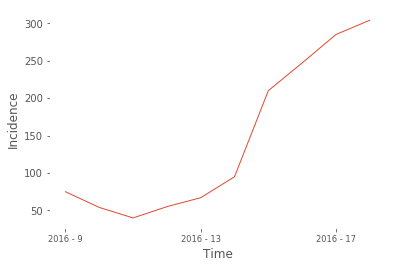

In [137]:
from contextlib import contextmanager
import sys, os

@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout
            
            
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.rcParams['lines.linewidth']=1
plt.rcParams['axes.facecolor']='w'

n_t_d = []
with open("../manuscript_code/province-biweek_with_delays.csv") as f:
    i = 0
    for line in f.readlines():
        if i > 0:
            n_t_d.append(line.replace("\n","").split(','))
        i+=1

n_t_d_1 = []

for elm in n_t_d:
    if elm[2] == "10":
        n_t_d_1.append(elm)


index_to_dates = {}
dates_to_index = {}
count = 0
for i in ["2014","2015","2016"]:
    for j in range(1,27):
        index_to_dates[count] = str(i)+str(j)
        dates_to_index[str(i)+str(j)] = count
        count +=1
        
reporting_matrix = np.zeros((26*3,26*3))

for elm in n_t_d_1:
    try:
        sick_date = elm[0]+elm[1]
        report_date = elm[-2] + elm[-1]
        cases = elm[3]
        reporting_matrix_row = dates_to_index[sick_date] 
        reporting_matrix_col =  dates_to_index[report_date] 
        reporting_matrix[reporting_matrix_row,reporting_matrix_col] = int(cases)
    except:
        pass
np.set_printoptions(suppress=True)    #np.set_printoptions(threshold=np.nan)

D=26
n_t_d = np.zeros((len(reporting_matrix),D))

for i in range(len(reporting_matrix)):
    for j in range(i,i+D):
        try:
            n_t_d[i,j-i] = reporting_matrix[i][j]
        except:
            pass
        
        
n_t_d = n_t_d
count = 1
for i in range(len(n_t_d)-26,len(n_t_d)):
    n_t_d[i,count:] = 0
    count +=1
np.set_printoptions(threshold=np.nan)


dates = []
for i in ["2014","2015","2016"]:
    for j in range(1,27):
        dates.append(i + " - "  + str(j))
    
    
    
every_other_date = []
for i in np.arange(0,len(dates),4):
    every_other_date.append(dates[i])

print (every_other_date)
plt.plot(np.sum(n_t_d,axis=1)[60:70])
plt.ylabel("Incidence")
plt.xticks(np.arange(0,len(np.sum(n_t_d,axis=1)[60:70]),4), every_other_date[15:], size='small')
plt.title("")
plt.xlabel("Time")
#plt.text(-2,-100,"Figure 2: Dengue incidence in Bangkok Thailand from  2016 bi-week 1 to 2016 bi-week 17.\n Here we can see that the partially reported data gives a very biased estimate of the \n current trend. If we forecast out using only the partially observed data,\n we would think that incidence is decreasing not increasing as it actually is.",fontsize=10)
#
plt.savefig('fig2.png',format='png',dpi=200)
plt.show()

#print(n_t_d[:10,])